This is a guided project with EDA and linear regression to predict laptop prices. As long as I learned with the guide, I take some notes to document my learning process.

Esse é um projeto guiado com análise exploratória de dados e regressão linear para predizer preços de notebooks. Enquanto eu aprendia com o guia, tomei algumas notas para documentar meu processo de apredizagem.

Original: https://colab.research.google.com/drive/1UuGubpE30tdeWoI8a4TpP1dhnZCu-mUQ?usp=sharing#scrollTo=NfeppUpZEYKS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r"C:\Users\Acer\Downloads\Laptop_Price_Prediction-main\Laptop_Price_Prediction-main\laptop_data.csv")

In [3]:
#to see how the data are distributed in dataset // para ver como os dados estão distribuídos no dataset
data.sample(10)

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
605,605,MSI,Gaming,15.6,4K Ultra HD 3840x2160,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 2TB HDD,Nvidia GeForce GTX 1060,Windows 10,1.8kg,122490.7200
441,441,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,4GB,256GB SSD,AMD Radeon 530,Windows 10,2.2kg,39906.7200
471,471,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,500GB HDD,AMD FirePro W4190M,Windows 10,1.9kg,61485.1200
1237,1237,Dell,Notebook,15.6,1366x768,Intel Core i5 6200U 2.3GHz,4GB,500GB HDD,Intel HD Graphics 520,Windows 7,2.24kg,39267.3600
1070,1070,Dell,Notebook,15.6,1366x768,Intel Core i3 6100U 2.3GHz,4GB,500GB HDD,Intel HD Graphics 520,Windows 10,2.06kg,25679.8944
119,119,Asus,Notebook,15.6,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8GB,256GB SSD,Nvidia GeForce 940MX,Windows 10,1.7kg,59567.0400
886,886,Dell,Notebook,15.6,1366x768,Intel Core i3 6006U 2.0GHz,4GB,1TB HDD,AMD Radeon R5 M420X,Linux,2.18kg,24279.6960
301,301,Asus,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,2.9kg,113060.1600
236,236,Acer,Notebook,15.6,1366x768,Intel Core i3 6006U 2GHz,4GB,1TB HDD,Intel HD Graphics 520,Linux,2.1kg,20779.2000
706,706,Acer,2 in 1 Convertible,13.3,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.6kg,53226.7200


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [5]:
data.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [6]:
data.tail()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
1298,1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.64
1299,1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.72
1300,1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.12
1301,1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.92
1302,1302,Asus,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Windows 10,2.2kg,19660.32


In [7]:
data.shape

(1303, 12)

In [8]:
data.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [9]:
data.describe()

,Unnamed: 0,Inches,Price
count,1303.00000,1303.000000,1303.000000
mean,651.00000,15.017191,59870.042910
std,376.28801,1.426304,37243.201786
min,0.00000,10.100000,9270.720000
25%,325.50000,14.000000,31914.720000
50%,651.00000,15.600000,52054.560000
75%,976.50000,15.600000,79274.246400
max,1302.00000,18.400000,324954.720000


Interesting thing to note is that mean and median in Price column is much more closer to the minimum price than the maximum price.

Algo interessante de se notar é que a média e a mediana estão muito mais próximas do preço mínimo do que do preço máximo.

# Here we finish our first look on the dataset and start the data cleaning // Aqui finalizamos nosso primeiro olhar ao conjunto de dados e iniciamos a limpeza.

In [10]:
data.drop(columns=['Unnamed: 0'],inplace=True)

In [11]:
#remove gb and kg from Ram and weight and convert the cols to numeric//remove gb e kg das colunas Ram e weight e converte
# as colunas para valores numéricos

data['Ram'] = data['Ram'].str.replace("GB", "")
data['Weight'] = data['Weight'].str.replace("kg", "")
data['Ram'] = data['Ram'].astype('int32')
data['Weight'] = data['Weight'].astype('float32')

<AxesSubplot:>

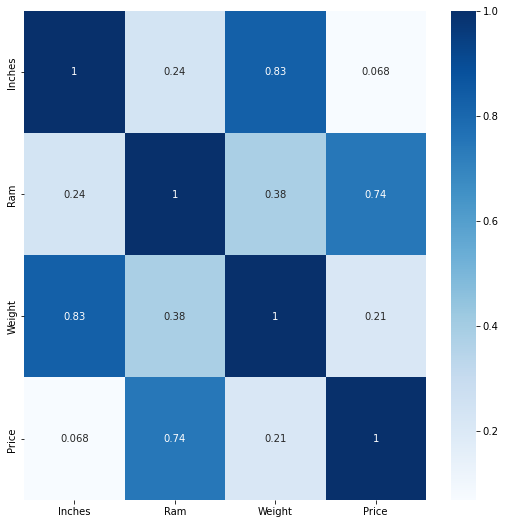

In [12]:
fig, ax = plt.subplots(figsize=(9, 9))
sns.heatmap(data.corr(), annot = True,cmap= 'Blues')

<function matplotlib.pyplot.show(close=None, block=None)>

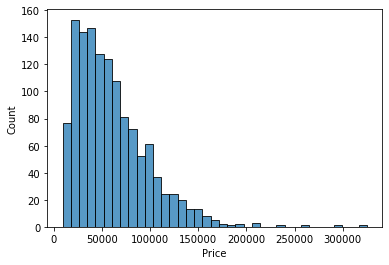

In [13]:
#distribution of price // distribuição de preço

sns.histplot(data['Price'])
plt.show
#we can see that the most popular prices are between 20000 and 60000 // podemos ver que os preços mais populares estão
#entre 20000 e 60000

In [14]:
comp_order = data['Company'].value_counts().sort_values(ascending=False).to_frame().index

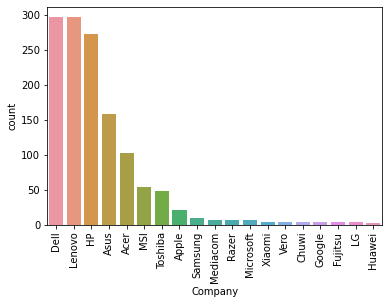

In [15]:
#shows how many laptops are from each brand // mostra quantos notebooks são de cada marca

sns.countplot(x=data['Company'], order=comp_order)
plt.xticks(rotation="vertical")
plt.show()

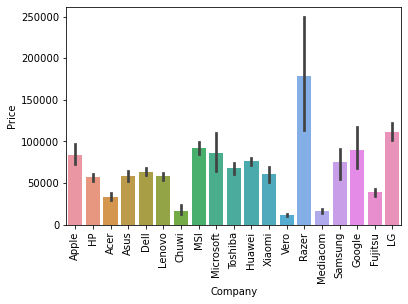

In [16]:
sns.barplot(x=data['Company'], y=data['Price'])
plt.xticks(rotation="vertical")
plt.show()

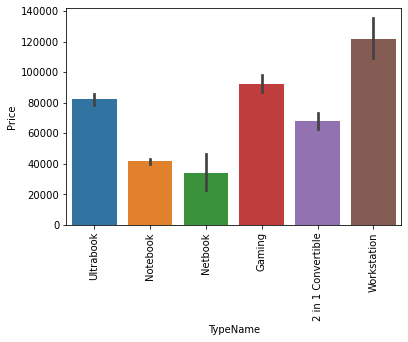

In [17]:
sns.barplot(x=data['TypeName'], y=data['Price'])
plt.xticks(rotation='vertical')
plt.show()

<AxesSubplot:xlabel='Inches', ylabel='Price'>

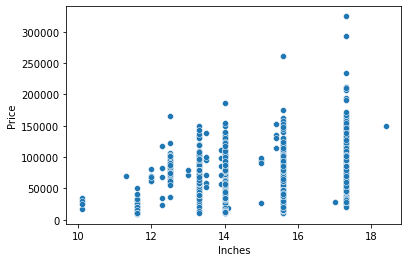

In [18]:
sns.scatterplot(x=data['Inches'], y=data['Price'])

In [19]:
resolution = data['ScreenResolution']

In [20]:
resolution

0               IPS Panel Retina Display 2560x1600
1                                         1440x900
2                                Full HD 1920x1080
3               IPS Panel Retina Display 2880x1800
4               IPS Panel Retina Display 2560x1600
                           ...                    
1298     IPS Panel Full HD / Touchscreen 1920x1080
1299    IPS Panel Quad HD+ / Touchscreen 3200x1800
1300                                      1366x768
1301                                      1366x768
1302                                      1366x768
Name: ScreenResolution, Length: 1303, dtype: object

In [21]:
#to separate touchscreen laptop from the others // para separar laptops touchscreen dos outros
data['Touchscreen']=data['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

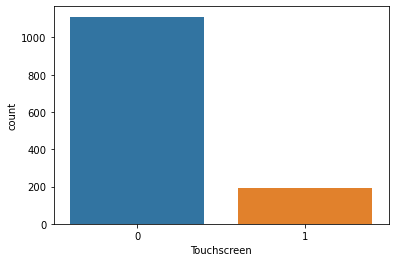

In [22]:
#how many laptops in data are touchscreen // quantos laptops são touchscreen

sns.countplot(data['Touchscreen'])
plt.show()

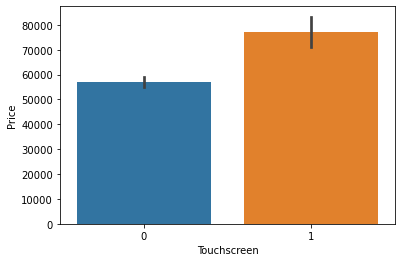

In [23]:
sns.barplot(x=data['Touchscreen'], y=data['Price'])
plt.show()

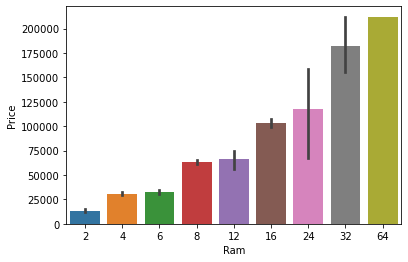

In [24]:
sns.barplot(x=data['Ram'], y=data['Price'])
plt.show()

In [25]:
data['Ips']=data['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

<AxesSubplot:xlabel='Ips', ylabel='Price'>

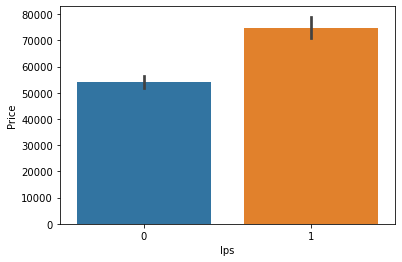

In [26]:
sns.barplot(x=data['Ips'], y=data['Price'])

<AxesSubplot:>

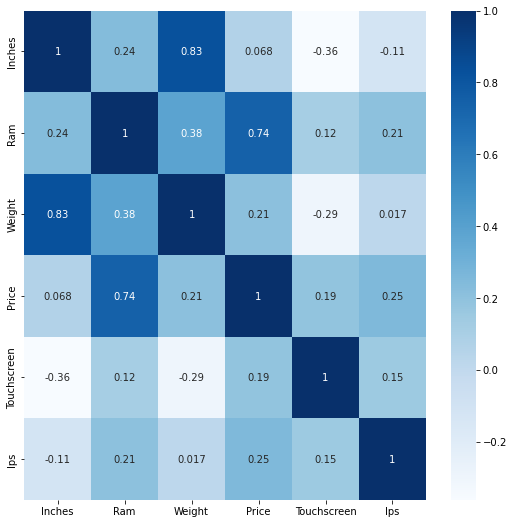

In [27]:
fig, ax = plt.subplots(figsize=(9, 9))
sns.heatmap(data.corr(), annot = True,cmap= 'Blues')

As we can see, inches and price have a very low correlation. The original project don't use heatmap as a guide, so we will follow the steps just to obtain the PPI.

Como podemos ver, polegadas e preço possuem uma correlação muito baixa. O projeto original não usa mapas de calor como guia, então seguiremos os passos apenas para obter o PPI.

In [28]:
#a variable to create a function that divide the resolution in horizontal and vertical // uma variável para criar uma função
#que divide a resolução em horizontal e vertical
s = "1440x900"
print(s.split()[-1].split("x")[0])
print(s.split()[-1].split("x")[1])

1440
900


In [29]:
def findXresolution(s):
  return s.split()[-1].split("x")[0]
def findYresolution(s):
  return s.split()[-1].split("x")[1]

In [30]:
data['X_res'] = data['ScreenResolution'].apply(lambda x: findXresolution(x))
data['Y_res'] = data['ScreenResolution'].apply(lambda x: findYresolution(x))

In [31]:
#convert the resolution to 'int' type // converte a resolução para o tipo 'int'
data['X_res'] = data['X_res'].astype('int')
data['Y_res'] = data['Y_res'].astype('int')

In [32]:
data.corr()['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
Ips            0.252208
X_res          0.556529
Y_res          0.552809
Name: Price, dtype: float64

Now we will combine X_res and Y_res to obtain the ppi (pixel per inches) // Agora vamos combinar X_res e Y_res para obter o ppi (pixel por polegada)

PPI = (x_res^2 + Y_res^2) / inches

In [33]:
data['ppi'] = (((data['X_res']**2) + (data['Y_res']**2))**0.5/data['Inches']).astype('float')

In [34]:
data.corr()['Price'].sort_values(ascending=False)

Price          1.000000
Ram            0.743007
X_res          0.556529
Y_res          0.552809
ppi            0.473487
Ips            0.252208
Weight         0.210370
Touchscreen    0.191226
Inches         0.068197
Name: Price, dtype: float64

In [35]:
#now drop screen res, x_res, y_res, inches // agora eliminamos screen res, x_res, y_res, inches
data.drop(columns = ['ScreenResolution', 'Inches','X_res','Y_res'], inplace=True)

##Now we will give some attention to the CPU column // Agora daremos atenção à coluna do CPU

In [36]:
data.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005


In [37]:
#we will extract Name of CPU which is first 3 words from Cpu column and then we will check which processor it is
#nós extraíremos o nome do CPU que são as 3 primeiras palavras da coluna CPU e então checaremos qual processador é

def fetch_processor(x):
    cpu_name = " ".join(x.split()[0:3])
    if cpu_name == 'Intel Core i7' or cpu_name == 'Intel Core i5' or cpu_name == 'Intel Core i3':
        return cpu_name
    elif cpu_name.split()[0] == 'Intel':
        return 'Other Intel Processor'
    else:
        return 'AMD Processor'
    

In [38]:
data['Cpu_brand'] = data['Cpu'].apply(lambda x: fetch_processor(x))

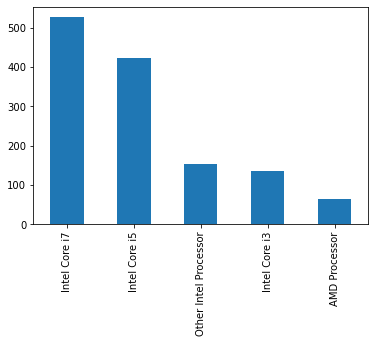

In [39]:
data['Cpu_brand'].value_counts().plot(kind='bar')
plt.show()

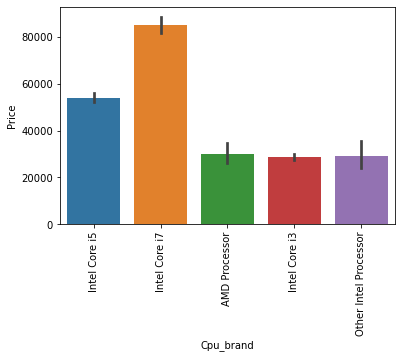

In [40]:
sns.barplot(x=data['Cpu_brand'], y=data['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [41]:
data.drop('Cpu', axis=1, inplace=True)

In [42]:
outlier = data[data.Price > 300000]

In [43]:
outlier.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu_brand
196,Razer,Gaming,32,1TB SSD,Nvidia GeForce GTX 1080,Windows 10,3.49,324954.72,1,0,254.671349,Intel Core i7


<AxesSubplot:>

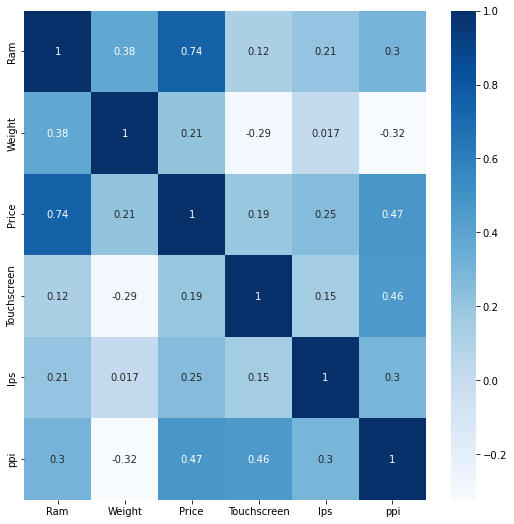

In [44]:
fig, ax = plt.subplots(figsize=(9, 9))
sns.heatmap(data.corr(), annot = True,cmap= 'Blues')

Apparentely, we find an outlier here that is much more expensive than all the others laptops without a visible reason. So we will do some adjusts to see if makes sense its price.

Aparentemente, encontramos um ponto fora da curva aqui que é muito mais caro que os outros sem uma razão aparente. Então faremos alguns ajustes para verificar se seu preço faz sentido.

In [45]:
data['ppi'].value_counts()

141.211998    430
100.454670    212
157.350512    133
127.335675    131
165.632118    110
111.935204     45
135.094211     31
276.053530     27
176.232574     25
282.423996     23
106.113062     22
209.800683     18
125.367428      9
117.826530      8
254.671349      7
331.264236      7
226.983005      6
200.842560      6
226.415547      6
234.507400      4
127.677940      4
352.465147      4
224.173809      4
146.860478      4
158.482530      4
220.534624      4
169.780899      2
189.905791      2
316.965060      2
199.692071      2
90.583402       2
220.842824      2
267.338436      1
119.723216      1
107.985646      1
161.725391      1
111.141337      1
194.947537      1
234.976765      1
Name: ppi, dtype: int64

In [46]:
ppi_test = data[data.ppi < 255]
ppi_test

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu_brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5
...,...,...,...,...,...,...,...,...,...,...,...,...
1297,Asus,Notebook,4,500GB HDD,Nvidia GeForce 920M,Windows 10,2.20,38378.6496,0,0,100.454670,Intel Core i7
1298,Lenovo,2 in 1 Convertible,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1,1,157.350512,Intel Core i7
1300,Lenovo,Notebook,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200,0,0,111.935204,Other Intel Processor
1301,HP,Notebook,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,0,0,100.454670,Intel Core i7


In [47]:
ppi_test = ppi_test[ppi_test.ppi > 254]
ppi_test

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu_brand
196,Razer,Gaming,32,1TB SSD,Nvidia GeForce GTX 1080,Windows 10,3.49,324954.7200,1,0,254.671349,Intel Core i7
659,Dell,Gaming,32,512GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.42,167691.8736,0,1,254.671349,Intel Core i7
723,Dell,Gaming,32,1TB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.36,194972.8320,0,0,254.671349,Intel Core i7
830,Razer,Gaming,32,512GB SSD,Nvidia GeForce GTX 1080,Windows 10,3.49,292986.7200,1,0,254.671349,Intel Core i7
894,MSI,Gaming,16,512GB SSD + 2TB HDD,Nvidia GeForce GTX 1060,Windows 10,2.43,141138.7200,0,1,254.671349,Intel Core i7
955,Dell,Gaming,16,512GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.36,168045.1200,0,1,254.671349,Intel Core i7
1017,Lenovo,Notebook,16,512GB SSD,Nvidia Quadro 3000M,Windows 7,2.40,158135.0400,0,1,254.671349,Intel Core i7


As we can see, all laptops with this specific PPI have the same CPU brand, and the two more expensives have touchscreen and both are from the same brand.

Como podemos ver, todos os notebooks com esse PPI específico possuem a mesma marca de CPU, e os dois mais caros tem touchscreen e são da mesma marca.

In [48]:
brand_test = data[data.Company == 'Razer']
brand_test

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu_brand
196,Razer,Gaming,32,1TB SSD,Nvidia GeForce GTX 1080,Windows 10,3.49,324954.72,1,0,254.671349,Intel Core i7
647,Razer,Gaming,16,256GB SSD,Nvidia GeForce GTX 1060,Windows 10,1.95,138474.72,0,0,157.350512,Intel Core i7
778,Razer,Gaming,16,512GB SSD,Nvidia GeForce GTX 1060,Windows 10,1.95,154458.72,0,0,157.350512,Intel Core i7
816,Razer,Ultrabook,16,512GB SSD,Intel HD Graphics 620,Windows 10,1.29,95850.72,1,1,352.465147,Intel Core i7
830,Razer,Gaming,32,512GB SSD,Nvidia GeForce GTX 1080,Windows 10,3.49,292986.72,1,0,254.671349,Intel Core i7
1117,Razer,Ultrabook,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.25,54825.12,1,0,352.465147,Intel Core i7
1231,Razer,Gaming,16,1TB SSD,Nvidia GeForce GTX 1060,Windows 10,1.95,186426.72,0,0,157.350512,Intel Core i7


<AxesSubplot:>

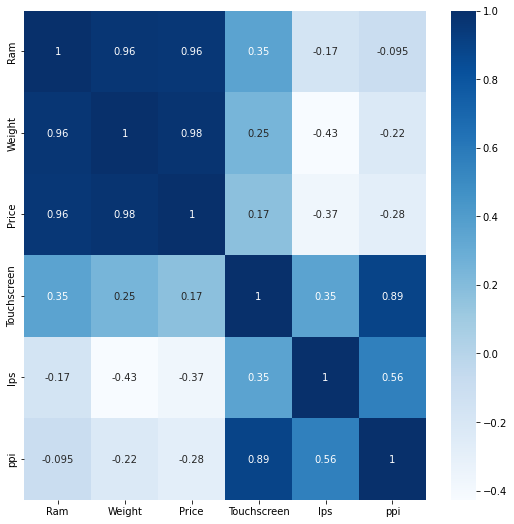

In [49]:
brand_test.drop('Company', axis=1, inplace=True)

fig, ax = plt.subplots(figsize=(9, 9))
sns.heatmap(brand_test.corr(), annot = True,cmap= 'Blues')

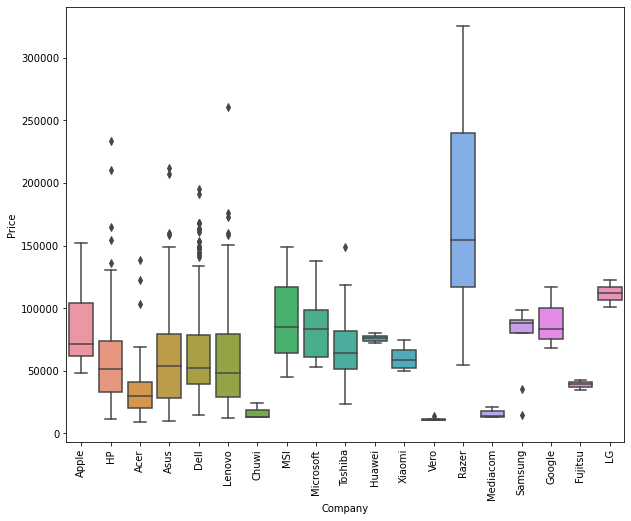

In [50]:
plt.figure(figsize=(10, 8))
ax = sns.boxplot(data=data, x='Company', y='Price')
plt.xticks(rotation="vertical")
plt.show()

Concluding the outlier check, we can see that Razer is a more expensive brand of laptops, but the correlation of it prices is still aligned with the rest of data we have. After preprocess, we can remove Razer from the dataset to see the model behavior without this brand.

Concluindo a checagem do ponto fora da curva, podemos ver que Razer é uma marca de laptops mais cara, mas a correlação de seus preços ainda está alinhado com o resto dos dados que temos. Depois do pré-processamento, podemos remover Razer do dataset para ver como o modelo se comporta sem essa marca.

# Now we will preprocessing 'memory' column, translating it values (HDD, SSD, storage...) to numeric values and use them in the model.

# Agora nós iremos pré processar a coluna 'memória', traduzindo seus valores (HDD, SSD, armazenamento...) para valores numéricos e usá-los no modelo.

In [51]:
data['Memory'] = data['Memory'].astype(str).replace('\.0', '', regex=True)
data['Memory'] = data['Memory'].astype(str).replace('GB', '')
data['Memory'] = data['Memory'].astype(str).replace('TB', '000')
new = data["Memory"].str.split("+", n = 1, expand = True)

data['first'] = new[0]
data['first'] = data['first'].str.strip()

data['second'] = new[1]

data['Layer1HDD'] = data['first'].apply(lambda x:1 if 'HDD' in x else 0)
data['Layer1SSD'] = data['first'].apply(lambda x:1 if 'SSD' in x else 0)
data['Layer1Hybrid'] = data['first'].apply(lambda x:1 if 'Hybrid' in x else 0)
data['Layer1Flash_Storage'] = data['first'].apply(lambda x:1 if 'Flash_Storage' in x else 0)

data['first'] = data['first'].str.replace(r'\D', '')

data['second'].fillna("0", inplace=True)

data['Layer2HDD'] = data['second'].apply(lambda x:1 if 'HDD' in x else 0)
data['Layer2SSD'] = data['second'].apply(lambda x:1 if 'SSD' in x else 0)
data['Layer2Hybrid'] = data['second'].apply(lambda x:1 if 'Hybrid' in x else 0)
data['Layer2Flash_Storage'] = data['second'].apply(lambda x:1 if 'Flash_Storage' in x else 0)

data['second'] = data['second'].str.replace(r'\D', '')

data['Layer2HDD'] = data['second'].apply(lambda x:1 if 'HDD' in x else 0)
data['Layer2SSD'] = data['second'].apply(lambda x:1 if 'SSD' in x else 0)
data['Layer2Hybrid'] = data['second'].apply(lambda x:1 if 'Hybrid' in x else 0)
data['Layer2Flash_Storage'] = data['second'].apply(lambda x:1 if 'Flash_Storage' in x else 0)

data['second'] = data['second'].str.replace(r'\D', '')

data['first'] = data['first'].astype(int)
data['second'] = data['second'].astype(int)

data['HDD'] = (data['first']*data['Layer1HDD']+data['second']*data['Layer2HDD'])
data['SSD'] = (data['first']*data['Layer1SSD']+data['second']*data['Layer2SSD'])
data['Hybrid'] = (data['first']*data['Layer1Hybrid']+data['second']*data['Layer2Hybrid'])
data['Flash_Storage'] = (data['first']*data['Layer1Flash_Storage']+data['second']*data['Layer2Flash_Storage'])

data.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid', 'Layer1Flash_Storage',
                  'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid', 'Layer2Flash_Storage'], inplace=True)

In [52]:
data.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu_brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,0
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0


In [53]:
data.drop(columns=['Memory', 'Flash_Storage', 'Hybrid'], inplace=True)

In [54]:
#GPU column treatment // tratamento da coluna de GPU

data['Gpu_brand'] = data['Gpu'].apply(lambda x:x.split()[0])

In [55]:
data['Gpu_brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu_brand, dtype: int64

In [56]:
#We have only one ARM GPU, so we will drop it // temos somente um ARM GPU, então excluíremos ele

data = data[data['Gpu_brand'] != 'ARM']

In [57]:
data.drop(columns=['Gpu'], inplace=True)

In [58]:
data.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu_brand,HDD,SSD,Gpu_brand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


In [59]:
#get the operational system // obter o sistema operacional

def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/ No OS/ Linux'

In [60]:
data['os'] = data['OpSys'].apply(cat_os)

In [61]:
data.drop(columns=['OpSys'], inplace=True)

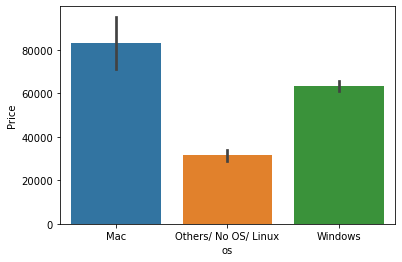

In [62]:
sns.barplot(x=data['os'], y=data['Price'])
plt.show()

In [63]:
data.head()

,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,ppi,Cpu_brand,HDD,SSD,Gpu_brand,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/ No OS/ Linux
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


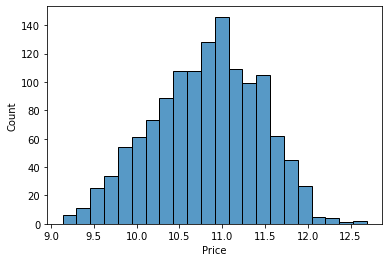

In [64]:
sns.histplot(np.log(data['Price']))
plt.show()

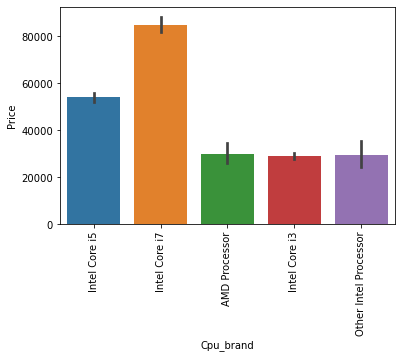

In [65]:
sns.barplot(x=data['Cpu_brand'], y=data['Price'])
plt.xticks(rotation='vertical')
plt.show()

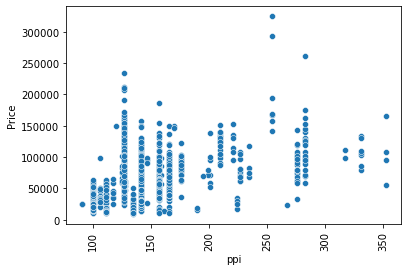

In [66]:
sns.scatterplot(x=data['ppi'], y=data['Price'])
plt.xticks(rotation='vertical')
plt.show()

## Modeling

In [67]:
X = data.drop(columns=['Price'])
Y = np.log(data['Price'])

In [68]:
X.head()

,Company,TypeName,Ram,Weight,Touchscreen,Ips,ppi,Cpu_brand,HDD,SSD,Gpu_brand,os
0,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,0,0,141.211998,Intel Core i5,0,256,Intel,Others/ No OS/ Linux
3,Apple,Ultrabook,16,1.83,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [69]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=2)

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

## Regressão linear // Linear regression

In [71]:
lin1 = ColumnTransformer(transformers=[
    ('col_tfn',OneHotEncoder(sparse=False,drop='first'),[0,1,2,7,10,11])
],remainder='passthrough')

lin2 = LinearRegression()

pipe1 = Pipeline([
    ('lin1',lin1),
    ('lin2',lin2)
])

pipe1.fit(X_train,Y_train)

Y_pred = pipe.predict(X_test)

print('R2 score',r2_score(Y_test,Y_pred))
print('MAE',mean_absolute_error(Y_test,Y_pred))

NameError: name 'pipe' is not defined

## Random forest

In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,2,7,10,11])
],remainder='passthrough')
step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)
pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])
pipe.fit(X_train,Y_train)
Y_pred2 = pipe.predict(X_test)
print('R2 score',r2_score(Y_test,Y_pred2))
print('MAE',mean_absolute_error(Y_test,Y_pred2))

## Exporting the model // Exportando o modelo

In [ ]:
import pickle
data.to_csv("df.csv", index=False)
pickle.dump(pipe,open('pipe.pkl','wb'))